In [2]:
import qutip as qt

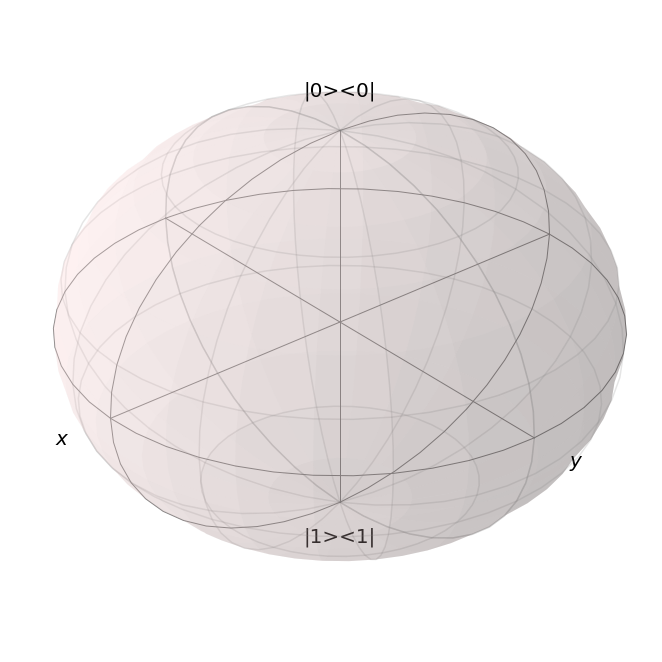

In [7]:
b = qt.Bloch()
#b3d = Bloch3d()
b.zlabel=["|0><0|","|1><1|"]
b.view=[-40, 30]
b.figsize=[10, 9]
b.show()

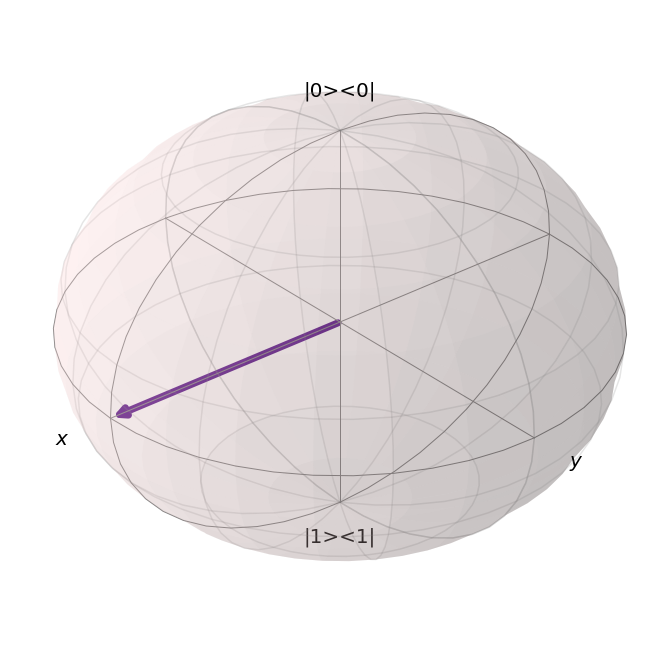

In [19]:
b.vector_color = ['indigo']
b.view = [-40, 30]

b.clear()
vec = [1,0,0]
b.vector_width = 7
b.add_vectors(vec)

b.show()

In [7]:
import matplotlib as mpl
from pylab import *
from qutip import *
from matplotlib import cm
import imageio

def animate_bloch(states, duration=0.1, save_all=False):

    b = Bloch()
    b.vector_color = ['r']
    b.view = [-40,30]
    images=[]
    try:
        length = len(states)
    except:
        length = 1
        states = [states]
    ## normalize colors to the length of data ##
    nrm = mpl.colors.Normalize(0,length)
    colors = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

    ## customize sphere properties ##
    b.point_color = list(colors) # options: 'r', 'g', 'b' etc.
    b.point_marker = ['o']
    b.point_size = [30]
    
    for i in range(length):
        b.clear()
        b.add_states(states[i])
        b.add_states(states[:(i+1)],'point')
        if save_all:
            b.save(dirc='tmp') #saving images to tmp directory
            filename="tmp/bloch_%01d.png" % i
        else:
            filename='temp_file.png'
            b.save(filename)
        images.append(imageio.imread(filename))
    imageio.mimsave('bloch_anim.gif', images, duration=duration)

In [9]:
states = []
thetas = linspace(0,pi,21)
for theta in thetas:
    states.append((cos(theta/2)*basis(2,0) + sin(theta/2)*basis(2,1)).unit())

animate_bloch(states, duration=0.1, save_all=True)

In [33]:
#from qutip import *
from scipy import *
def qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist):
    # operators and the hamiltonian
    sx = sigmax(); sy = sigmay(); sz = sigmaz(); sm = sigmam()
    H = w * (cos(theta) * sz + sin(theta) * sx)
    # collapse operators
    c_op_list = []
    n_th = 0.5 # temperature
    rate = gamma1 * (n_th + 1)
    if rate > 0.0: c_op_list.append(sqrt(rate) * sm)
    rate = gamma1 * n_th
    if rate > 0.0: c_op_list.append(sqrt(rate) * sm.dag())
    rate = gamma2
    if rate > 0.0: c_op_list.append(sqrt(rate) * sz)


    # evolve and calculate expectation values
    output = mesolve(H, psi0, tlist, c_op_list, [sx, sy, sz])  
    return output.expect[0], output.expect[1], output.expect[2]
    
## calculate the dynamics
w     = 1.0 * 2 * pi   # qubit angular frequency
theta = 0.2 * pi       # qubit angle from sigma_z axis (toward sigma_x axis)
gamma1 = 0.5      # qubit relaxation rate
gamma2 = 0.2      # qubit dephasing rate
# initial state
a = 1.0
psi0 = (a* basis(2,0) + (1-a)*basis(2,1))/(sqrt(a**2 + (1-a)**2))
tlist = linspace(0,4,250)
#expectation values for ploting
sx, sy, sz = qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist)


/Users/tesla/Mis Cosas/python_things/venvironments/venv_QC/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
/Users/tesla/Mis Cosas/python_things/venvironments/venv_QC/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
/Users/tesla/Mis Cosas/python_things/venvironments/venv_QC/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.cos is deprecated and will be removed in SciPy 2.0.0, use numpy.cos instead
  
/Users/tesla/Mis Cosas/python_things/venvironments/venv_QC/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  
/Users/tesla/Mis Cosas/python_things/venvironments/venv_QC/lib/python3.7/site-packages/ipykernel_launcher.py:11:

In [34]:
b = Bloch()
b.vector_color = ['r']
b.view = [-40,30]
for i in range(len(sx)):
    b.clear()
    b.add_vectors([np.sin(theta),0,np.cos(theta)])
    b.add_points([sx[:i+1],sy[:i+1],sz[:i+1]])
    b.save(dirc='temp') #saving images to temp directory in current working directory

In [39]:
!ffmpeg -r 20 -b 1800 -i bloch_%01d.png bloch.mp4

/bin/bash: ffmpeg: command not found


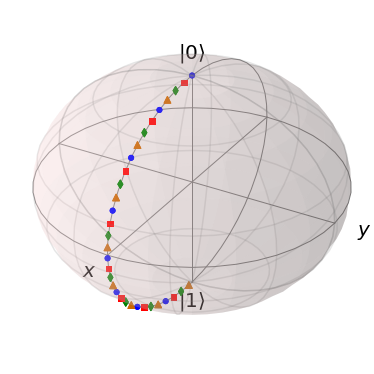

In [36]:
import qutip as qt
import numpy as np


b = qt.Bloch()

theta = np.arange(0,np.pi,0.1)

for ii in range(len(theta)):
     b.add_points([np.sin(theta[ii]),0,np.cos(theta[ii])])

b.show() # Changed here

TypeError: 'Axes3D' object is not iterable

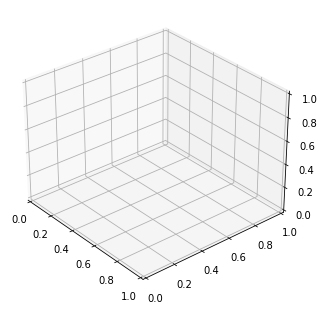

In [37]:
from pylab import *
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig,azim=-40,elev=30)
sphere = Bloch(axes=ax)

def animate(i):
    sphere.clear()
    sphere.add_vectors([np.sin(theta),0,np.cos(theta)])
    sphere.add_points([sx[:i+1],sy[:i+1],sz[:i+1]])
    sphere.make_sphere()
    return ax

def init():
    sphere.vector_color = ['r']
    return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(sx)),
                            init_func=init, blit=True, repeat=False)
ani.save('bloch_sphere.mp4', fps=20, clear_temp=True)